In [1]:
import  time
import  numpy as np
from    config          import *
from    agent           import Agent
from    enviroment      import Enviroment
from    IPython.display import clear_output
from    matplotlib      import pyplot as plt

In [2]:
grid_size = GRID_SIZE
num_col = grid_size

possibleActions = POSSIBLE_ACTIONS

action_space_dict = {
    "U" : 0,
    "D" : 1,
    "L" : 2,
    "R" : 3,
    "S" : 4
}
n_agents          = N_AGENTS
allplayerpos      = PLAYER_POS[: n_agents]
enemy_list_pos    = ENEMY_POS[: n_agents]
batch_size        = BATCH_SIZE
replay_memory_len = REPLAY_MEMORY_LEN

In [3]:
def decode_state(state_num):
    return int(state_num/num_col), state_num%num_col

def state_encode(row,col):
    return row*num_col + col 

In [4]:
all_agents = []
for i in range(0, N_AGENTS):
    all_agents.append(Agent(i, allplayerpos[i]))


initial_states = []
for agent in all_agents:
    initial_states.append(state_encode(agent.x, agent.y))

enemy_states = []
for enemy_pos in enemy_list_pos:
    enemy_states.append(state_encode(enemy_pos[0], enemy_pos[1]))
print(initial_states, enemy_states)
env = Enviroment(initial_states = initial_states, enemy_states = enemy_states)
env.render()

[0] [24]
--------------------------------------------
P	-	-	-	-	

-	-	-	-	-	

-	-	-	-	-	

-	-	-	-	-	

-	-	-	-	X	

--------------------------------------------


In [5]:
def run():
    total_step = 0
    rewards_list = []
    timesteps_list = []
    total_steps = 1
    for episode in range(1, EPISODES):
        print("Episode number: ", episode)

        reward_all = 0
        time_step = 1
        for agent in all_agents:
            agent.terminal = False
        
        [old_map, states, enemy_states] = env.reset()
        # print("player states: ", states)
        for agent in all_agents:
            agent.set_pos(allplayerpos[agent.index])

        done = [False for _ in range(n_agents)]
        is_terminal = [False for _ in range(n_agents)]

        while not all(is_terminal):

            print(" is_terminal",  is_terminal)

            # env.render(clear=True)
            actions = []
            for agent in all_agents:

                actions.append(agent.act(old_map, possibleActions))

            new_map, next_states, rewards, done = env.step(actions)

            for agent in all_agents:
                agent.set_pos(decode_state(next_states[agent.index]))

            for agent in all_agents:
                agent.store(new_map, rewards[agent.index], \
                done[agent.index], old_map, action_space_dict[actions[agent.index]])

                if done[agent.index] == True:
                    agent.terminal = True
                    is_terminal[agent.index] = True
                    print("agent reached landmark--------------------------------", agent.index)

            print("actions", actions)

            for agent in all_agents:
                print("agent epsilon ", agent.epsilon, "agent memory len",\
                    len(agent.expirience_replay), "steps ", time_step,\
                    "reward", rewards[agent.index], "next state ", next_states[agent.index], "agent position ",\
                    agent.return_coordinates())

            if time_step >= TIME_STEPS:
                print("max steps reached")
                break

            old_map = new_map

            total_step += 1
            time_step += 1
            total_steps+1
            reward_all += sum(rewards)

            if all(is_terminal):
                print("-----------------------------------all agents reached landmark--------------------------------")
                for agent in all_agents:
                    agent.save_model()
        print("total rewards", reward_all)
        for agent in all_agents:
            agent.retrain(episode)

        rewards_list.append(reward_all)
        timesteps_list.append(time_step)


In [6]:
run()

Episode number:  1
 is_terminal [False]
random action
actions ['U']
agent epsilon  1.0 agent memory len 1 steps  1 reward -2 next state  0 agent position  (0, 0)
 is_terminal [False]
random action
actions ['L']
agent epsilon  1.0 agent memory len 2 steps  2 reward -2 next state  0 agent position  (0, 0)
 is_terminal [False]
random action
actions ['R']
agent epsilon  1.0 agent memory len 3 steps  3 reward -1 next state  1 agent position  (0, 1)
 is_terminal [False]
random action
actions ['D']
agent epsilon  1.0 agent memory len 4 steps  4 reward -1 next state  6 agent position  (1, 1)
 is_terminal [False]
random action
actions ['L']
agent epsilon  1.0 agent memory len 5 steps  5 reward -1 next state  5 agent position  (1, 0)
 is_terminal [False]
random action
actions ['D']
agent epsilon  1.0 agent memory len 6 steps  6 reward -1 next state  10 agent position  (2, 0)
 is_terminal [False]
random action
actions ['L']
agent epsilon  1.0 agent memory len 7 steps  7 reward -2 next state  10 a

KeyboardInterrupt: 

In [ ]:
map = env.reset_map.reshape(-1, GRID_SIZE, GRID_SIZE, 1)

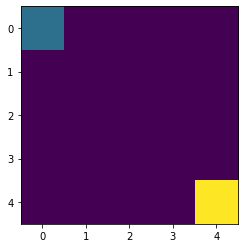

In [ ]:
plt.imshow(map[0])

In [ ]:
env.enemy_states
env.agents_state

[4]